### Take four models of polynomials of degree (2, 3, 4, 5), and use the normal equation to optimize theta (with small lambda term, as shown in class). Split the weather data using (80:20) split, print train, and test loss for each model. Write which model you consider best based on train and test loss along with proper explanation.


normal equation = \[
(X^T X) \theta - (X^T y)
\]


In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
models=[2,3,4,5]

In [3]:
#loading data
data=xr.open_dataset(r"C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IISERB docs\workshoop assignments\PERCDR_0.25deg_2001_2010_precipitation_data.nc")
df=data.to_dataframe().reset_index()
df
#data

,datetime,lon,lat,crs,precip
0,2001-01-01,77.00,31.50,1,4.00
1,2001-01-01,77.00,31.25,1,5.91
2,2001-01-01,77.00,31.00,1,4.48
3,2001-01-01,77.00,30.75,1,4.40
4,2001-01-01,77.00,30.50,1,5.16
...,...,...,...,...,...
759611,2010-12-31,80.75,29.50,1,4.67
759612,2010-12-31,80.75,29.25,1,3.78
759613,2010-12-31,80.75,29.00,1,2.20
759614,2010-12-31,80.75,28.75,1,1.93


In [4]:
col=df.columns
col
y=df[['precip']].values
y
scale=StandardScaler()

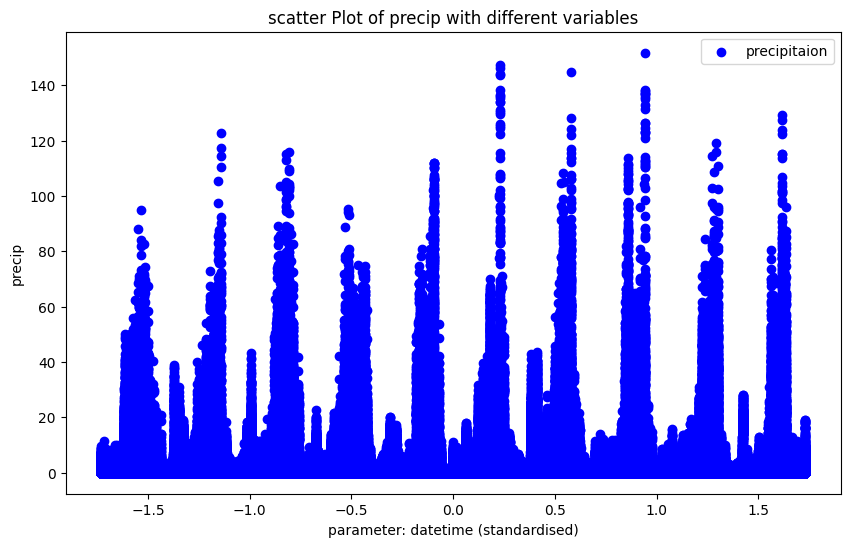

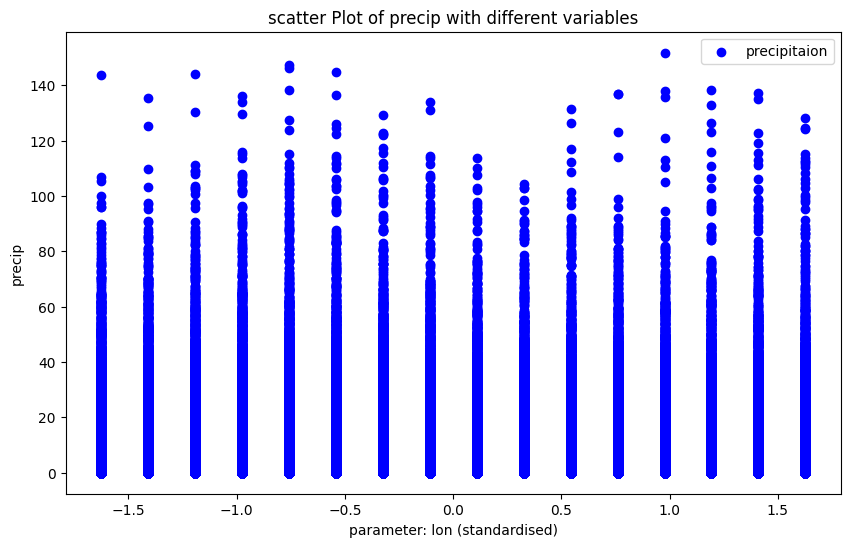

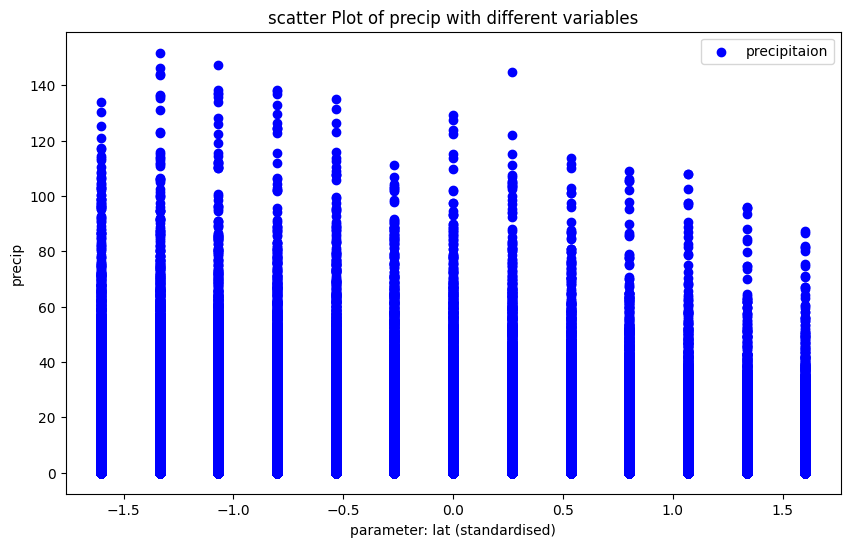

In [5]:
for x in col[:len(col)-2]:
    X_reshaped = df[x].values.reshape(-1, 1)
    X_scaled = scale.fit_transform(X_reshaped)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled, y, color='blue', label='precipitaion')
    plt.xlabel(f'parameter: {x} (standardised)')
    plt.ylabel('precip')
    plt.title('scatter Plot of precip with different variables')
    plt.legend()
    plt.show()


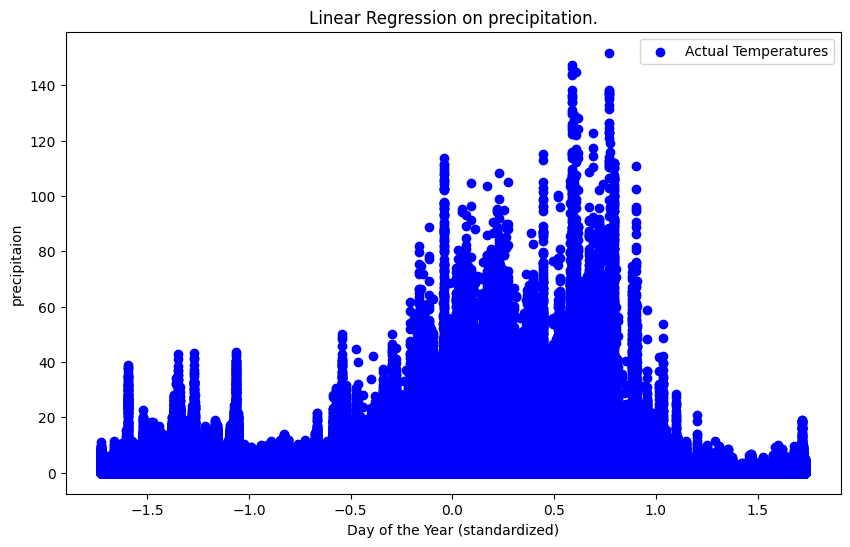

In [6]:
# Extract features and target variable
df['DAY_OF_YEAR'] = df['datetime'].dt.dayofyear
# Use 'DAY_OF_YEAR' as the feature and 'TMAX' (maximum temperature) as the target variable
X = df[['DAY_OF_YEAR']].values  # Feature: day of the year
y = df['precip'].values  # Target: maximum temperature
df1 = df.sort_values('datetime').reset_index(drop=True)
X_scaled = scale.fit_transform(X)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Temperatures')
plt.xlabel('Day of the Year (standardized)')
plt.ylabel('precipitaion')
plt.title('Linear Regression on precipitation.')
plt.legend()
plt.show()


Polynomial Degree: 2


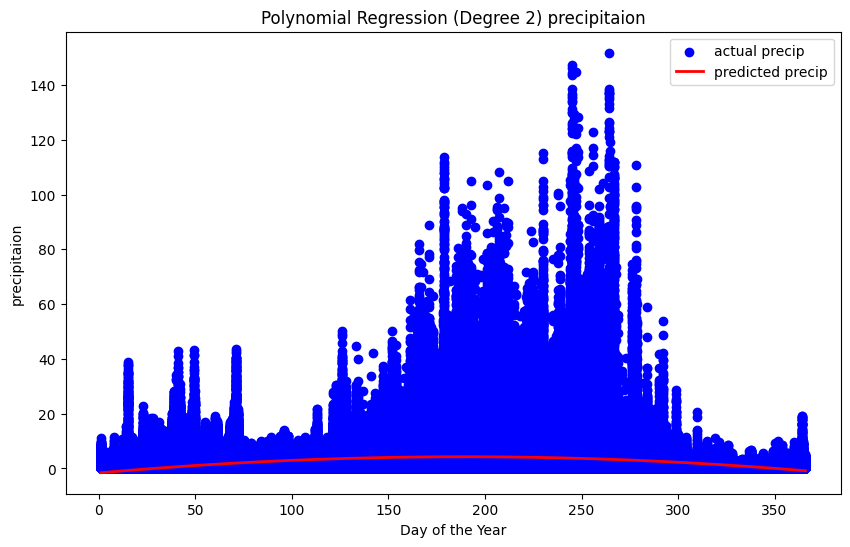

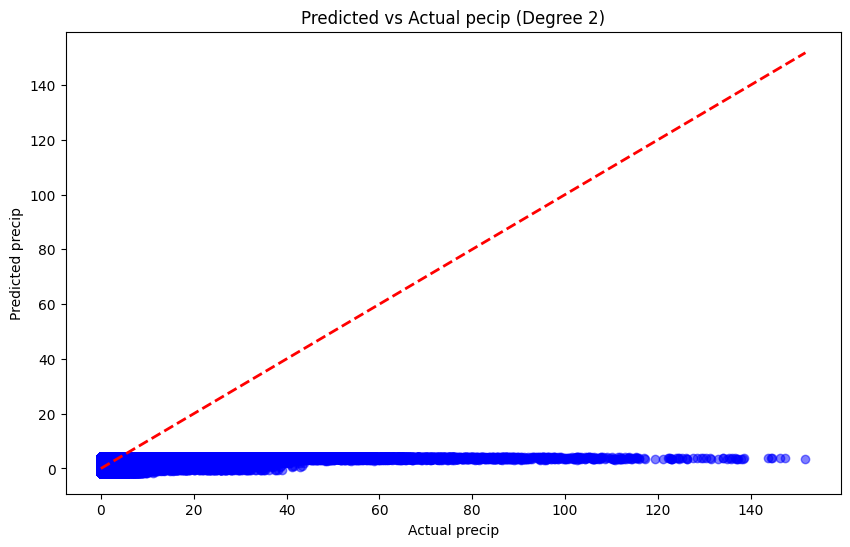

Mean Squared Error (MSE): 42.50822318006955
R-squared (R2): 0.060019781562104746

Polynomial Degree: 3


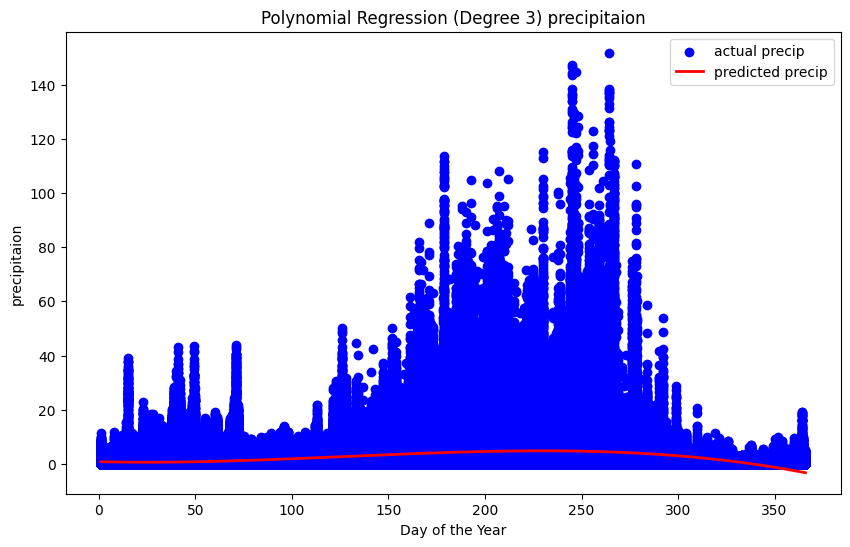

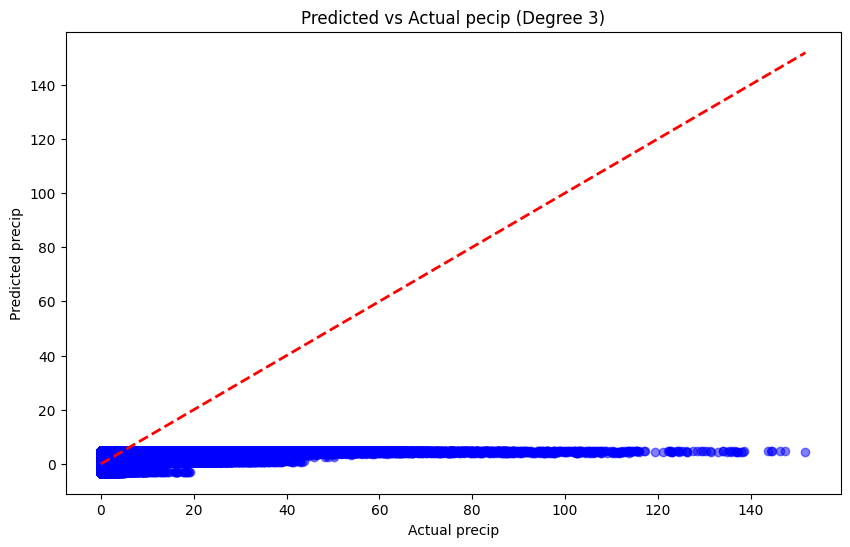

Mean Squared Error (MSE): 41.690736879921396
R-squared (R2): 0.07809677687023919

Polynomial Degree: 4


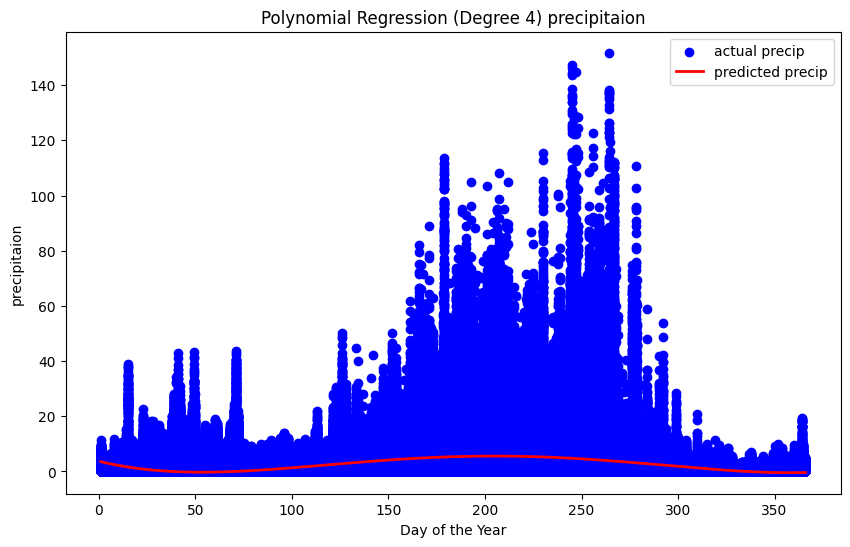

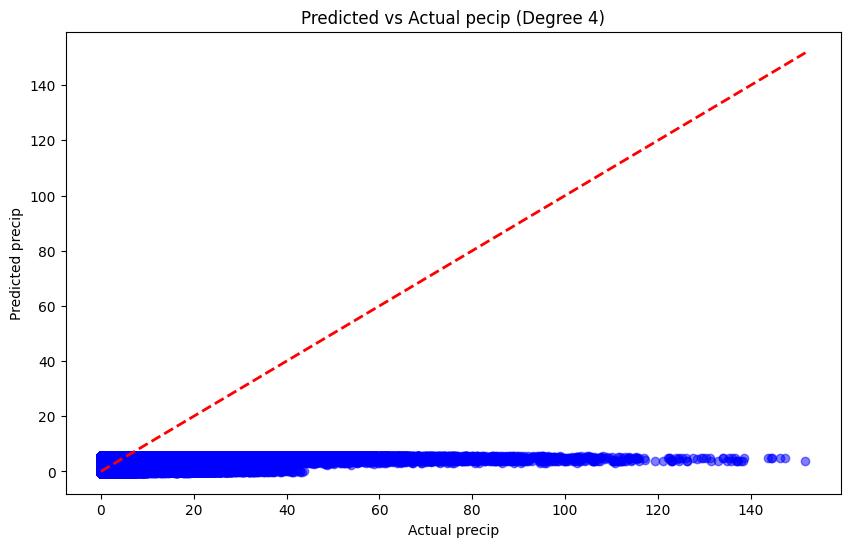

Mean Squared Error (MSE): 40.822521005151295
R-squared (R2): 0.09729555034426884

Polynomial Degree: 5


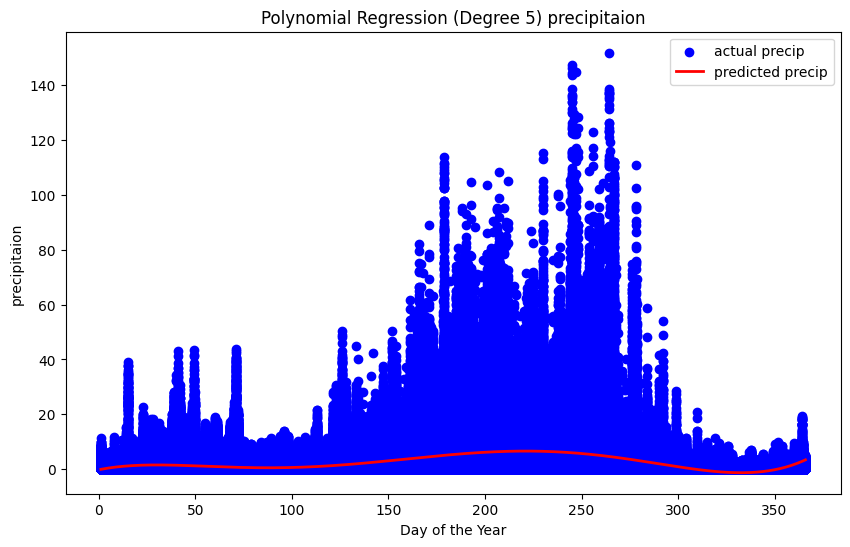

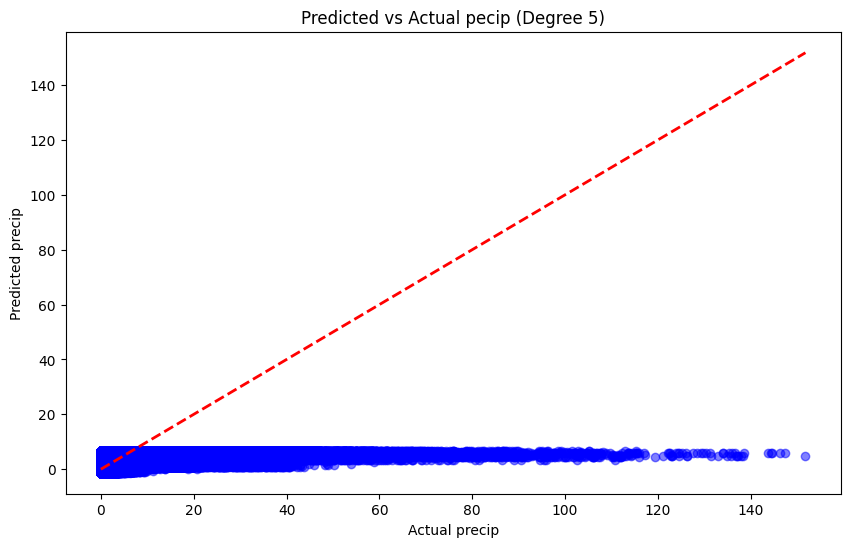

Mean Squared Error (MSE): 39.564468485649925
R-squared (R2): 0.12511474375251475


In [7]:
# Experiment with different polynomial degrees

for degree in models:
    print(f"\nPolynomial Degree: {degree}")
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    # Add a column of ones to X to account for the bias term (intercept)
    X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

    # Add lambda term
    lambda_ = 1e-5
    I = np.eye(X_b.shape[1])
    I[0, 0] = 0  # Do not change intercept term

    # Solve for theta using the regularized normal equation
    theta = np.linalg.inv(X_b.T.dot(X_b) + lambda_ * I).dot(X_b.T).dot(y)  # Here small constant has been added (Not to intercept term)

    # Make predictions
    y_pred = X_b.dot(theta)
    
    # Sort the values by the feature before plotting
    sorted_indices = np.argsort(X[:, 0])
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Plot the data and regression curve
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='actual precip')
    plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='predicted precip')
    plt.xlabel('Day of the Year')
    plt.ylabel('precipitaion')
    plt.title(f'Polynomial Regression (Degree {degree}) precipitaion')
    plt.legend()
    plt.show()

    # Scatter plot of predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual precip')
    plt.ylabel('Predicted precip')
    plt.title(f'Predicted vs Actual pecip (Degree {degree})')
    plt.show()

    # Calculate and print performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

taking single feature into account wont work, we'll also have to see how precipitaion behaves with lat lon as well, as R2 score is pretty low as well along with high error. 

In [8]:
df.columns

Index(['datetime', 'lon', 'lat', 'crs', 'precip', 'DAY_OF_YEAR'], dtype='object')

In [10]:
# correlation of datetime with precip
df_corr=df.groupby('datetime')[['precip']].corr()
df_corr

,,precip
datetime,,
2001-01-01,precip,1.0
2001-01-02,precip,1.0
2001-01-03,precip,1.0
2001-01-04,precip,1.0
2001-01-05,precip,1.0
...,...,...
2010-12-27,precip,1.0
2010-12-28,precip,1.0
2010-12-29,precip,1.0


In [11]:
# correlation of lon with precip
df_corr2=df.groupby('lon')[['precip']].corr()
df_corr2

,,precip
lon,,
77.00,precip,1.0
77.25,precip,1.0
77.50,precip,1.0
77.75,precip,1.0
78.00,precip,1.0
78.25,precip,1.0
78.50,precip,1.0
78.75,precip,1.0
79.00,precip,1.0


In [12]:
# correlation of lat with precip
df_corr3=df.groupby('lat')[['precip']].corr()
df_corr3

,,precip
lat,,
28.50,precip,1.0
28.75,precip,1.0
29.00,precip,1.0
29.25,precip,1.0
29.50,precip,1.0
29.75,precip,1.0
30.00,precip,1.0
30.25,precip,1.0
30.50,precip,1.0


the above 3 feerures are to be taken into account as they are highly correlated to the precipitation.

In [ ]:
features=['datetime','lon','lat']